In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ctr-in-advertisement/Ad_click_prediction_train (1).csv
/kaggle/input/ctr-in-advertisement/Ad_Click_prediciton_test.csv


In [45]:
import seaborn as sns

In [46]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(10,5)})

In [47]:
df = pd.read_csv("/kaggle/input/ctr-in-advertisement/Ad_click_prediction_train (1).csv")

In [48]:
df

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0


<AxesSubplot:xlabel='campaign_id', ylabel='count'>

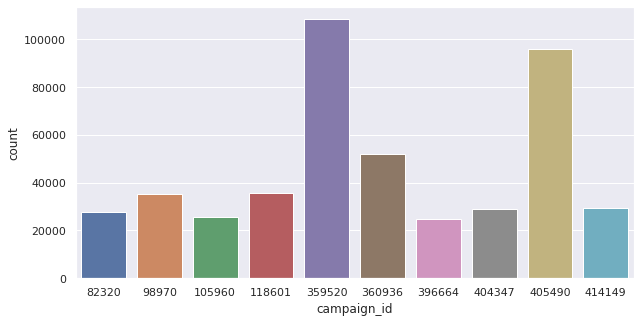

In [49]:
sns.countplot(x=df['campaign_id'])

<AxesSubplot:xlabel='campaign_id', ylabel='count'>

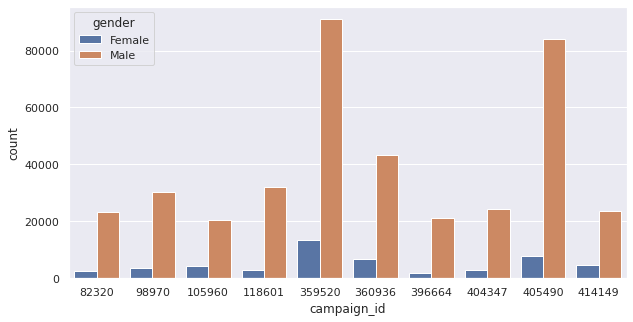

In [50]:
sns.countplot(x=df['campaign_id'],hue = df['gender'])

<AxesSubplot:xlabel='campaign_id', ylabel='count'>

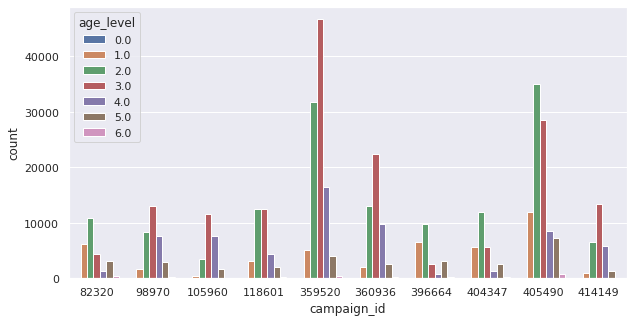

In [51]:
sns.countplot(x=df['campaign_id'],hue = df['age_level'])

# Customer distribution 

<AxesSubplot:xlabel='gender', ylabel='count'>

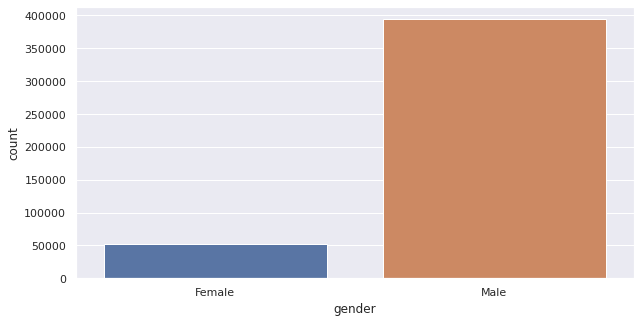

In [52]:
sns.countplot(x=df['gender'])

<AxesSubplot:xlabel='product_category_1', ylabel='count'>

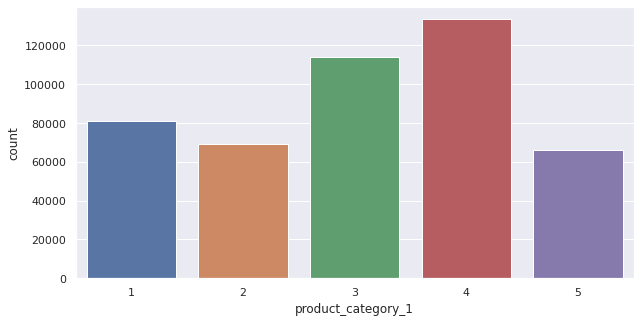

In [53]:
sns.countplot(x=df['product_category_1'])

<AxesSubplot:xlabel='product', ylabel='count'>

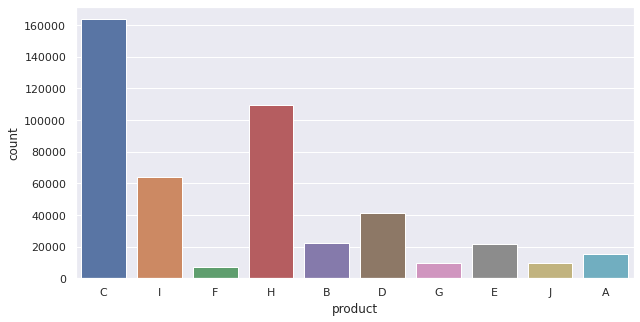

In [54]:
sns.countplot(x=df['product'])

# Product distribution on the basis of gender

In [55]:
df_female = df.loc[df['gender']=='Female']

In [56]:
df_female

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
6,17583,2017-07-02 00:01,1091463,F,405490,60305,3,NaN,9.0,Female,3.0,3.0,4.0,0,0
13,21726,2017-07-02 00:02,243253,C,360936,13787,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463272,583364,2017-07-07 23:58,570774,H,118601,28529,5,82527.0,10.0,Female,4.0,3.0,3.0,0,0
463274,583139,2017-07-07 23:58,569954,H,118601,28529,5,82527.0,8.0,Female,2.0,1.0,NaN,0,0
463284,294195,2017-07-07 23:59,1059354,C,360936,13787,5,NaN,9.0,Female,3.0,3.0,NaN,0,0
463285,587385,2017-07-07 23:59,1059354,H,118601,28529,5,82527.0,9.0,Female,3.0,3.0,NaN,0,0


#  Product distribution of females

<AxesSubplot:xlabel='product', ylabel='count'>

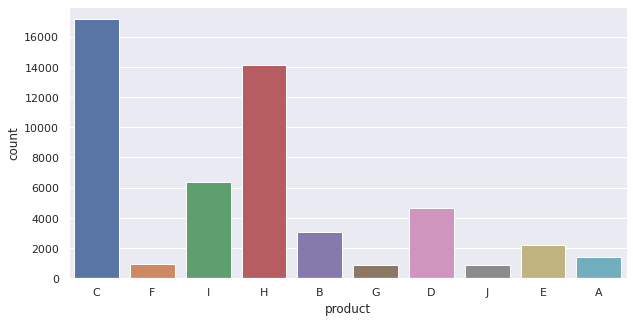

In [57]:
sns.countplot(x=df_female['product'])

# Product distribution of males

<AxesSubplot:xlabel='product', ylabel='count'>

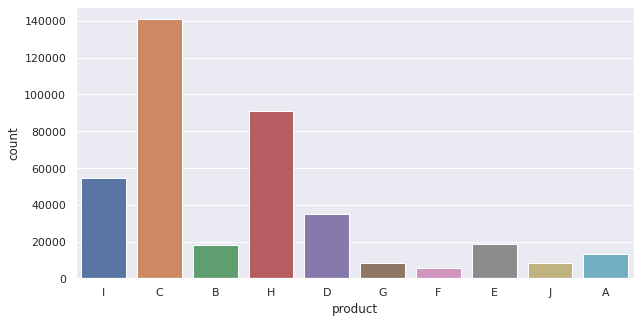

In [58]:
sns.countplot(x=df.loc[df['gender']=='Male']['product'])

<AxesSubplot:xlabel='gender', ylabel='count'>

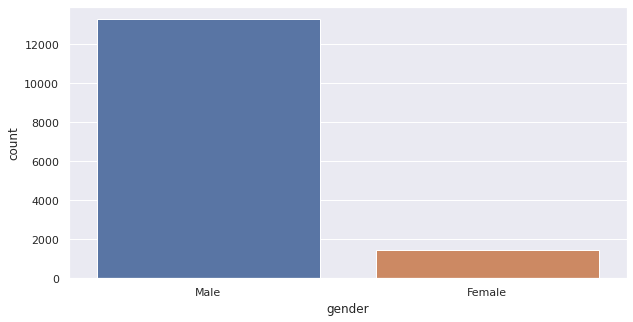

In [59]:
sns.countplot(x=df.loc[df['product']=='A']['gender'])

# need some correction 

C
        session_id          DateTime  user_id product  campaign_id  \
0           140690  2017-07-02 00:00   858557       C       359520   
1           333291  2017-07-02 00:00   243253       C       105960   
2           129781  2017-07-02 00:00   243253       C       359520   
4            90569  2017-07-02 00:01   663656       C       405490   
7           461128  2017-07-02 00:01   469098       C       360936   
...            ...               ...      ...     ...          ...   
463259      470866  2017-07-07 23:56   232506       C       105960   
463275       97565  2017-07-07 23:58   663536       C       405490   
463282      292866  2017-07-07 23:59   521376       C       360936   
463284      294195  2017-07-07 23:59  1059354       C       360936   
463290       45023  2017-07-07 23:59  1113780       C       405490   

        webpage_id  product_category_1  product_category_2  user_group_id  \
0            13787                   4                 NaN           10.0   
1  

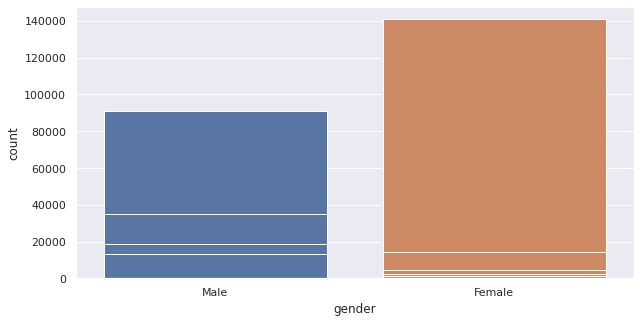

In [60]:
for m in df['product'].unique():
    print(m)
    sns.countplot(x=df.loc[df['product']==m ]['gender'])
    print(df.loc[df['product']==m])
    print('############################################################################################################')
    
    

<AxesSubplot:xlabel='gender', ylabel='count'>

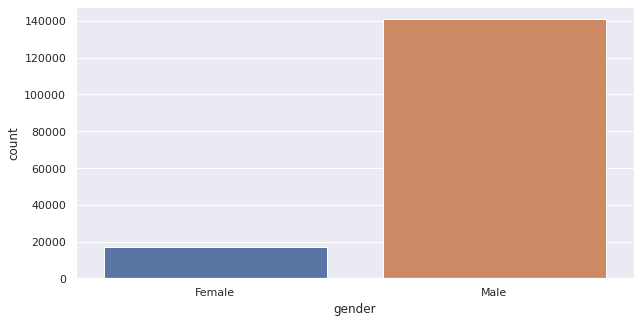

In [61]:
sns.countplot(x=df.loc[df['product']=='C']['gender'])

<AxesSubplot:xlabel='product', ylabel='count'>

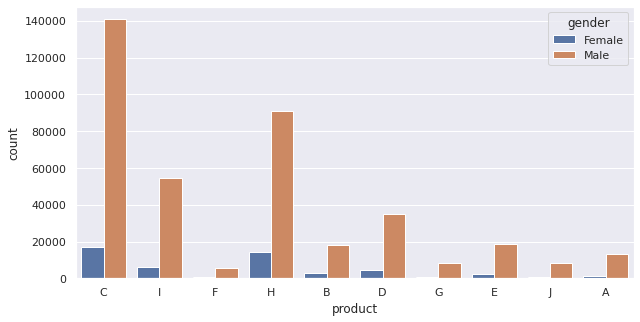

In [62]:
sns.countplot(x=df['product'],hue= df['gender'])

<AxesSubplot:xlabel='product', ylabel='count'>

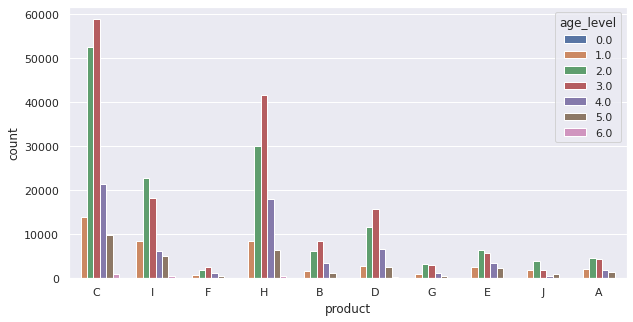

In [63]:
#sns.set_context("notebook",font_scale =1.2)
sns.countplot(x=df['product'],hue= df['age_level'])